In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.
/home/nate/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nate/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nate/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nate/.local/lib/python3.7/site-packages/tensorflow/python/framewo

In [2]:
import matplotlib.pyplot as plt

In [3]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

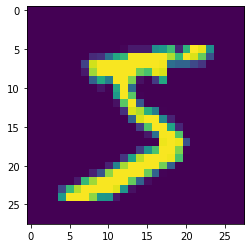

In [6]:
plt.imshow(X_train[0])

In [7]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [8]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [10]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 22s - loss: 0.1859 - accuracy: 0.9440 - val_loss: 0.1161 - val_accuracy: 0.9636
Epoch 2/10
 - 21s - loss: 0.0777 - accuracy: 0.9761 - val_loss: 0.0764 - val_accuracy: 0.9754
Epoch 3/10
 - 21s - loss: 0.0534 - accuracy: 0.9831 - val_loss: 0.0831 - val_accuracy: 0.9748
Epoch 4/10
 - 22s - loss: 0.0413 - accuracy: 0.9867 - val_loss: 0.0732 - val_accuracy: 0.9792
Epoch 5/10
 - 21s - loss: 0.0322 - accuracy: 0.9895 - val_loss: 0.0785 - val_accuracy: 0.9787
Epoch 6/10
 - 21s - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0841 - val_accuracy: 0.9772
Epoch 7/10
 - 21s - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0706 - val_accuracy: 0.9811
Epoch 8/10
 - 21s - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0771 - val_accuracy: 0.9817
Epoch 9/10
 - 21s - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0904 - val_accuracy: 0.9794
Epoch 10/10
 - 21s - loss: 0.0175 - accuracy: 0.9949 - val_loss: 0.0871 - val_accuracy: 0.9804


In [12]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.980400025844574% 
 Error: 0.019599974155426025


In [13]:
model.save('classification_model.h5')

In [14]:
from keras.models import load_model

In [15]:
pretrained_model = load_model('classification_model.h5')